# Reading HTML Tables with Pandas
Chris Mofitt. "Reading HTML Tables with Pandas". _Practical Business Python_, 20 Sept. 2020, https://pbpython.com/pandas-html-table.html.

Use pandas [read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html) to turn an HTML table into a pandas DataFrame.

## Basic Usage
First example uses a table from the Politics section of the Minnesota page on Wikipedia, https://en.wikipedia.org/wiki/Minnesota.

<img align="left" src="images/mn_voting_history.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')

In [2]:
print(f'Total tables: {len(table_MN)}')

Total tables: 29


In [3]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='Election results from statewide races')
len(table_MN)

1

It should go without saying that the text in the "match" term must _exactly_ match a string that's actually there (for example, in case).

In [4]:
df = table_MN[0]
df.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3%,52.4%,2.3%
1,2020,Senator,43.5%,48.8%,7.7%
2,2018,Governor,42.4%,53.9%,3.7%
3,2018,Senator,36.2%,60.3%,3.4%
4,2018,Senator,42.4%,53.0%,4.6%


Pandas makes it easy to read in the table (also handling hte year column that spans multiple rows), and easier than trying to scrape it yourself.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    26 non-null     int64 
 1   Office  26 non-null     object
 2   GOP     26 non-null     object
 3   DFL     26 non-null     object
 4   Others  26 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


Need to convert GOP, DFL and Other columns to numerics for further analysis.

```python
df['GOP'.astype('float')
```
results in an error:
```python
ValueError: could not convert string to float: '42.4%'
```

The most likely culprit is the ```%```. Get rid of it with pandas ```replace()```. See [this article](https://pbpython.com/currency-cleanup.html). The ```regex=True``` param is needed because ```%``` is not the full string value.

In [6]:
df['GOP'].replace({'%':''}, regex=True).astype('float')

0     45.3
1     43.5
2     42.4
3     36.2
4     42.4
5     44.9
6     44.5
7     42.9
8     45.1
9     30.6
10    43.2
11    43.8
12    42.0
13    46.7
14    37.9
15    47.6
16    44.4
17    49.5
18    45.5
19    43.3
20    34.3
21    35.0
22    41.3
23    63.3
24    49.1
25    31.9
Name: GOP, dtype: float64

Now call and replace all the ```%``` values, converting to numbers.

In [7]:
df = df.replace({'%': ''}, regex=True)
df[['GOP', 'DFL', 'Others']] = df[['GOP', 'DFL', 'Others']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    26 non-null     int64  
 1   Office  26 non-null     object 
 2   GOP     26 non-null     float64
 3   DFL     26 non-null     float64
 4   Others  26 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
df.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3,52.4,2.3
1,2020,Senator,43.5,48.8,7.7
2,2018,Governor,42.4,53.9,3.7
3,2018,Senator,36.2,60.3,3.4
4,2018,Senator,42.4,53.0,4.6


## More Advanced Data Cleaning
Example is from [US GDP](https://en.wikipedia.org/wiki/Economy_of_the_United_States) table on Wikipedia.

<img align="left" src="images/us_gdp.png">

(Except this isn't what it actually looks like any more -- the exact text of column names have changed!)

This is a little harder to match only one table, but using 'Nominal GPD' gets what we want as the first in the list.

In [9]:
table_GDP = pd.read_html('https://en.wikipedia.org/wiki/Economy_of_the_United_States', match='Nominal GDP')
df_GDP = table_GDP[0]

In [10]:
df_GDP.head()

,Year,Nominal GDP(billions USD),GDP per capita(USD),GDP growth(real),Inflation rate(in %),Unemployment(in %),Budget balance(in % of GDP)[105],Government debt held by public(in % of GDP)[106],Current accountbalance(in % of GDP)
0,2020 (est),20934.0,57589,−3.5 %,0.62 %,11.1 %,−n/a %,79.9 %,−n/a %
1,2019,21439.0,64674,2.2 %,1.8 %,3.5 %,−4.6 %,78.9 %,−2.5 %
2,2018,20611.2,62869,3.0 %,2.4 %,3.9 %,−3.8 %,77.8 %,−2.4 %
3,2017,19519.4,60000,2.3%,2.1 %,4.4 %,−3.4 %,76.1%,−2.3 %
4,2016,18715.0,57878,1.7 %,1.3 %,4.9 %,−3.1 %,76.4%,−2.3 %


In [11]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              41 non-null     object 
 1   Nominal GDP(billions USD)                         41 non-null     float64
 2   GDP per capita(USD)                               41 non-null     int64  
 3   GDP growth(real)                                  41 non-null     object 
 4   Inflation rate(in %)                              41 non-null     object 
 5   Unemployment(in %)                                41 non-null     object 
 6   Budget balance(in % of GDP)[105]                  41 non-null     object 
 7   Government debt held by public(in % of GDP)[106]  41 non-null     object 
 8   Current accountbalance(in % of GDP)               41 non-null     object 
dtypes: float64(1), int64(1),

Needs cleanup. Unfortunately trying to remove ```%``` throws an error. The problem is a hidden char, ```xa0```, a/k/a "non-breaking Latin1 (ISO 8859-1) space"). After some trial and error, author decided to use the ```normalize``` method to clean this up. For more see Xu Liang. "Difference Between NFD, NFC, NFKD, and NFKC Explained with Python Code". _Towards Data Science_, 14 Nov. 2019, https://towardsdatascience.com/difference-between-nfd-nfc-nfkd-and-nfkc-explained-with-python-code-e2631f96ae6c.

Start by creating this function: 

In [12]:
from unicodedata import normalize

def clean_normalize_whitespace(x):
    if isinstance(x, str):
        return normalize('NFKC', x).strip()
    else:
        return x


Then use ```applymap``` to run against the frame:

In [13]:
df_GDP = df_GDP.applymap(clean_normalize_whitespace)

In [14]:
df_GDP.head()

,Year,Nominal GDP(billions USD),GDP per capita(USD),GDP growth(real),Inflation rate(in %),Unemployment(in %),Budget balance(in % of GDP)[105],Government debt held by public(in % of GDP)[106],Current accountbalance(in % of GDP)
0,2020 (est),20934.0,57589,−3.5 %,0.62 %,11.1 %,−n/a %,79.9 %,−n/a %
1,2019,21439.0,64674,2.2 %,1.8 %,3.5 %,−4.6 %,78.9 %,−2.5 %
2,2018,20611.2,62869,3.0 %,2.4 %,3.9 %,−3.8 %,77.8 %,−2.4 %
3,2017,19519.4,60000,2.3%,2.1 %,4.4 %,−3.4 %,76.1%,−2.3 %
4,2016,18715.0,57878,1.7 %,1.3 %,4.9 %,−3.1 %,76.4%,−2.3 %


In [15]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              41 non-null     object 
 1   Nominal GDP(billions USD)                         41 non-null     float64
 2   GDP per capita(USD)                               41 non-null     int64  
 3   GDP growth(real)                                  41 non-null     object 
 4   Inflation rate(in %)                              41 non-null     object 
 5   Unemployment(in %)                                41 non-null     object 
 6   Budget balance(in % of GDP)[105]                  41 non-null     object 
 7   Government debt held by public(in % of GDP)[106]  41 non-null     object 
 8   Current accountbalance(in % of GDP)               41 non-null     object 
dtypes: float64(1), int64(1),

But ```applymap``` doesn't get the columns:

In [16]:
df_GDP.columns[7]

'Government debt held by public(in\xa0% of GDP)[106]'

A few options here, but author goes with ```clean_normalize_whitespace()``` on columns by (1) converting to a series and (2) using ```apply``` to run the function.

In [17]:
df_GDP.columns = df_GDP.columns.to_series().apply(clean_normalize_whitespace)
df_GDP.columns[7]

'Government debt held by public(in % of GDP)[106]'

```python
df_GDP.columns = df_GDP.columns.to_series().apply(clean_normalize_whitespace)
df_GDP.columns[7]
```
will also throw an error, ```ValueError: could not convert string to float '-3.5'```.
    
This was tricky, because it required recognizing the difference in Unicode that exists between an dash or hyphen (```−```) and a minus (```‐```). But once you do, ```replace``` can be used to fix it.

In [18]:
df_GDP['GDP growth(real)'].replace({'%': '', '−': '-'}, regex=True).astype('float')

0    -3.5
1     2.2
2     3.0
3     2.3
4     1.7
5     3.1
6     2.5
7     1.8
8     2.2
9     1.6
10    2.6
11   -2.5
12   -0.2
13    1.9
14    2.9
15    3.3
16    3.8
17    2.8
18    1.8
19    1.0
20    4.1
21    4.8
22    4.5
23    4.4
24    3.7
25    2.7
26    4.0
27    2.7
28    3.6
29   -0.1
30    1.9
31    3.7
32    4.2
33    3.5
34    3.5
35    4.2
36    7.2
37    4.6
38   -1.8
39    2.6
40   -0.2
Name: GDP growth(real), dtype: float64

The ```Year``` column also needs attention. For the latest year it may have "(est)" after the year. That is bad. The solution is to conver the column to an int
Be sure to escape the parens since they are also special characters for a regex:

In [19]:
df['Year'].replace({'%': '', '−': '-', '\(est\)': ''}, regex=True).astype('int')

0     2020
1     2020
2     2018
3     2018
4     2018
5     2016
6     2014
7     2014
8     2012
9     2012
10    2010
11    2008
12    2008
13    2006
14    2006
15    2004
16    2002
17    2002
18    2000
19    2000
20    1998
21    1996
22    1996
23    1994
24    1994
25    1992
Name: Year, dtype: int64

Need to set some columns to int and some to float, but ```pd.numeric()``` won't allow that, so ```astype()``` it is.
Fortunately, ```astype()``` can take a dictionary of column names and data types!

Here's how to define that in this example (many column names changed by Wikipedia since author's original article was published, below reflects those changes to date):

In [20]:
col_type = {
    'Year': 'float',
    'Nominal GDP(billions USD)': 'float',
    'GDP per capita(USD)': 'int',
    'GDP growth(real)': 'float',
    'Inflation rate(in %)': 'float',
    'Unemployment(in %)': 'float',
    'Budget balance(in % of GDP)[105]': 'float',
    'Government debt held by public(in % of GDP)[106]': 'float',
    'Current accountbalance(in % of GDP)': 'float'
}


Here's a shortcut for building a dict of the cols with ```float``` as the default value:

```python
dict.fromkeys(df_GDP.columns, 'float')
```

Single dict with values to replace:

In [21]:
clean_dict = {'%': '', '−': '-', '\(est\)': ''}

This is how to change col type the hard way
```python
df_GDP['Year'] = df_GDP['Year'].replace(clean_dict, regex=True).replace({'-n/a ': np.nan})astype(int)
```
Same to change the GDP growth column:
```python
df_GDP['GDP growth(real)'] = df_GDP['GDP growth(real)'].replace(clean_dict, regex=True).replace({'-n/a ': np.nan}).astype('float')
```

Now replace on df, convert types and get clean numeric values:

In [22]:
df_GDP = df_GDP.replace(clean_dict, regex=True).replace({'-n/a ': np.nan}).astype(col_type)

In [24]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              41 non-null     float64
 1   Nominal GDP(billions USD)                         41 non-null     float64
 2   GDP per capita(USD)                               41 non-null     int64  
 3   GDP growth(real)                                  41 non-null     float64
 4   Inflation rate(in %)                              41 non-null     float64
 5   Unemployment(in %)                                41 non-null     float64
 6   Budget balance(in % of GDP)[105]                  40 non-null     float64
 7   Government debt held by public(in % of GDP)[106]  41 non-null     float64
 8   Current accountbalance(in % of GDP)               40 non-null     float64
dtypes: float64(8), int64(1)


In [25]:
df_GDP

,Year,Nominal GDP(billions USD),GDP per capita(USD),GDP growth(real),Inflation rate(in %),Unemployment(in %),Budget balance(in % of GDP)[105],Government debt held by public(in % of GDP)[106],Current accountbalance(in % of GDP)
0,2020.0,20934.0,57589,-3.5,0.62,11.1,NaN,79.9,NaN
1,2019.0,21439.0,64674,2.2,1.80,3.5,-4.6,78.9,-2.5
2,2018.0,20611.2,62869,3.0,2.40,3.9,-3.8,77.8,-2.4
3,2017.0,19519.4,60000,2.3,2.10,4.4,-3.4,76.1,-2.3
4,2016.0,18715.0,57878,1.7,1.30,4.9,-3.1,76.4,-2.3
5,2015.0,18224.8,56770,3.1,0.10,5.3,-2.4,72.5,-2.2
6,2014.0,17521.3,54993,2.5,1.60,6.2,-2.8,73.7,-2.1
7,2013.0,16784.9,52737,1.8,1.50,7.4,-4.0,72.2,-2.1
8,2012.0,16155.3,51404,2.2,2.10,8.1,-5.7,70.3,-2.6
9,2011.0,15517.9,49736,1.6,3.10,8.9,-7.3,65.8,-2.9


<AxesSubplot:xlabel='Year'>

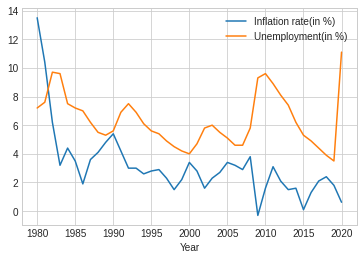

In [26]:
plt.style.use('seaborn-whitegrid')
df_GDP.plot.line(x='Year', y=['Inflation rate(in %)', 'Unemployment(in %)'])

<AxesSubplot:xlabel='Year'>

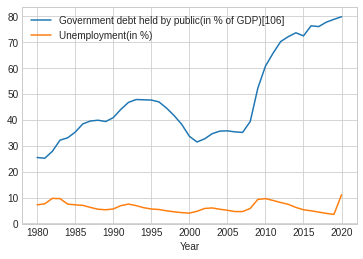

In [27]:
plt.style.use('seaborn-whitegrid')
df_GDP.plot.line(x='Year', y=['Government debt held by public(in % of GDP)[106]', 'Unemployment(in %)'])

<AxesSubplot:xlabel='Year'>

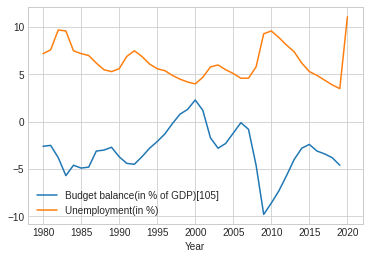

In [28]:
plt.style.use('seaborn-whitegrid')
df_GDP.plot.line(x='Year', y=['Budget balance(in % of GDP)[105]', 'Unemployment(in %)'])

<AxesSubplot:xlabel='Year'>

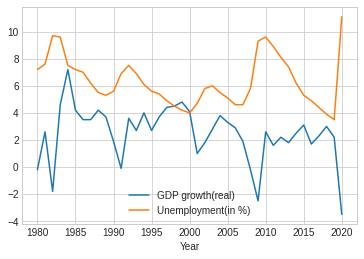

In [29]:
plt.style.use('seaborn-whitegrid')
df_GDP.plot.line(x='Year', y=['GDP growth(real)', 'Unemployment(in %)'])